# Análise de dados para Banco

- Definição do problema e o objetivo da Análise: Churn. Identificar potencial perfil do cliente que deixa de ser cliente.
- Explorar os dados (EDA).
- Anotações e considerações sobre a breve análise.
- Conclusões e insights.

## CARREGAR BIBLIOTECAS

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


## CARREGAR  DATASET

In [3]:
churn_df = pd.read_csv('Bank Customer Churn Prediction.csv')
churn_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn_df.info() # Ver tipo de dados das colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
churn_df.nunique().sort_values() # Ver as variações de preenchimento dos campos.

gender                  2
credit_card             2
active_member           2
churn                   2
country                 3
products_number         4
tenure                 11
age                    70
credit_score          460
balance              6382
estimated_salary     9999
customer_id         10000
dtype: int64

### VAMOS VER EM QUAIS PAÍSES O BANCO ATUA

In [6]:
# Ver quais são os três países
churn_df.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

### VERIFICAR A FAIXA DE IDADE DOS CLIENTES

In [7]:
idade_min = churn_df.age.min()
idade_max = churn_df.age.max()
print(f'Nosso dataset contém clientes cuja idade vai de {idade_min} até {idade_max} anos.') # O f é pra trazer variável de fora. Format.


Nosso dataset contém clientes cuja idade vai de 18 até 92 anos.


### VERIFICAR CLIENTES QUE ESTÃO COM SALDO ZERADO NA CONTA

In [8]:
churn_df.query('balance == 0')

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,15701354,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,15592531,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,15737173,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,15632264,476,France,Female,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15605622,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0
9992,15657105,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0
9994,15719294,800,France,Female,29,2,0.0,2,0,0,167773.55,0
9995,15606229,771,France,Male,39,5,0.0,2,1,0,96270.64,0


### VERIFICAR CLIENTES COM MAIOR SALDO NA CONTA

In [9]:
churn_df.query(f'balance in {churn_df.balance.nlargest(3).to_list()} or estimated_salary in {churn_df.estimated_salary.nlargest(3).to_list()}')

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
2092,15757408,655,Spain,Male,38,3,250898.09,3,0,1,81054.00,1
3280,15715622,583,France,Female,57,3,238387.56,1,0,1,147964.99,1
3580,15634359,639,Germany,Female,41,5,98635.77,1,1,0,199970.74,0
4417,15697270,608,Spain,Male,27,4,153325.10,1,1,1,199953.33,0
6646,15662021,685,Spain,Female,42,2,0.00,2,0,0,199992.48,0
8733,15714241,749,Spain,Male,42,9,222267.63,1,0,0,101108.85,1


## EXPLORATORY DATA ANALYSIS

In [10]:
# GÊNERO
churn_df.gender.value_counts(normalize=True) # O normalize = True deixa o valor em porcentagem

Male      0.5457
Female    0.4543
Name: gender, dtype: float64

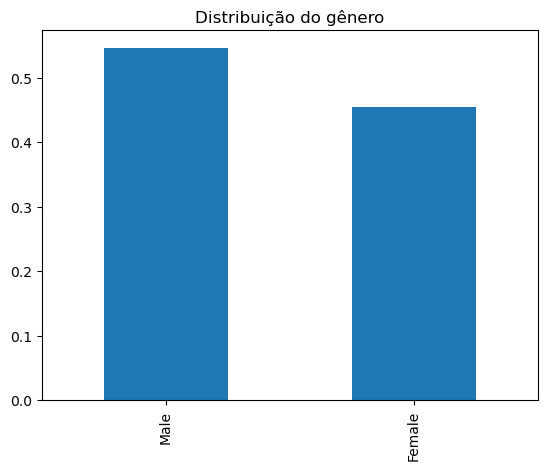

In [11]:
# VAMOS VER EM GRÁFICO
_ = churn_df.gender.value_counts(normalize=True).plot.bar()
_ = plt.title('Distribuição do gênero')
_ = plt.style.use('bmh') 


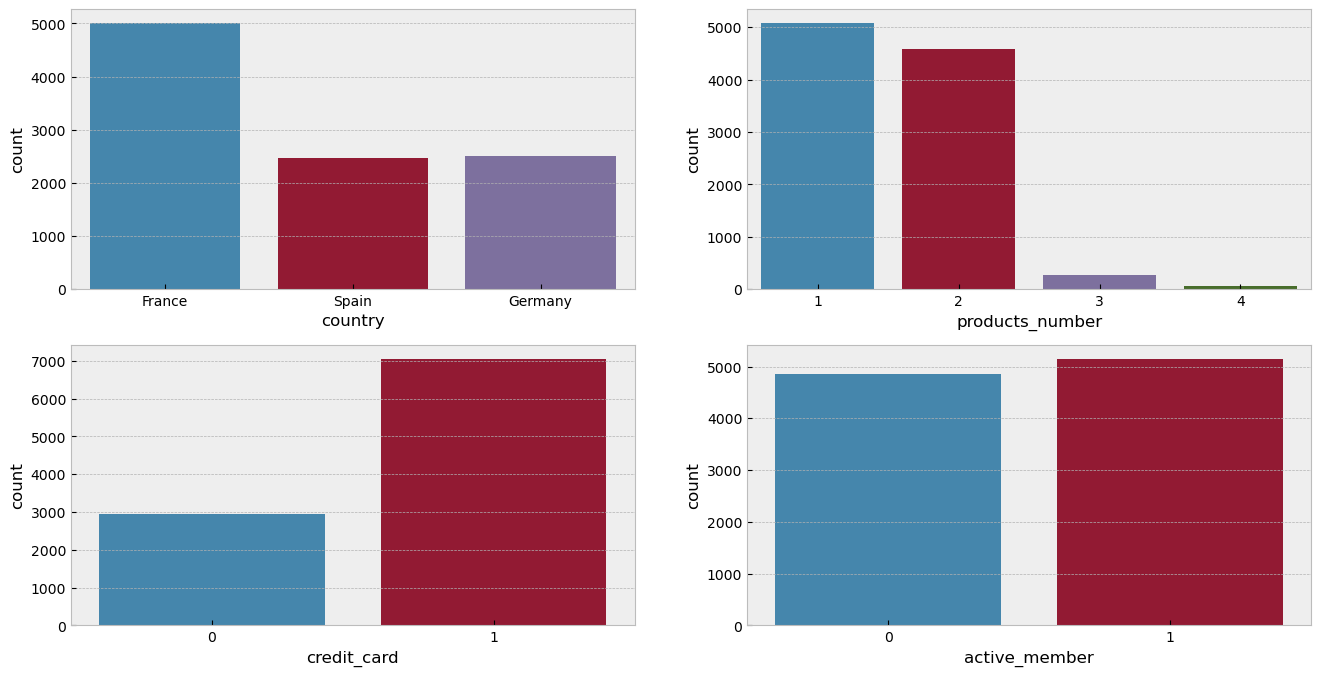

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8)) 
_ = sns.countplot(data=churn_df, x='country', ax=axes[0][0])
_ = sns.countplot(data=churn_df, x='products_number', ax=axes[0][1])
_ = sns.countplot(data=churn_df, x='credit_card', ax=axes[1][0])
_ = sns.countplot(data=churn_df, x='active_member', ax=axes[1][1])
_ = plt.style.use('bmh') 




### ANOTAÇÕES

- O banco parece atuar com mais força na França.
- Vemos que os clientes, em sua maioria, possuem 1 ou 2 produtos contratados.
- A maioria dos clientes possui cartão de crédito.


### COMO ESTÃO DISTRIBUÍDOS OS CLIENTES DE ACORDO COM O SALDO NA CONTA

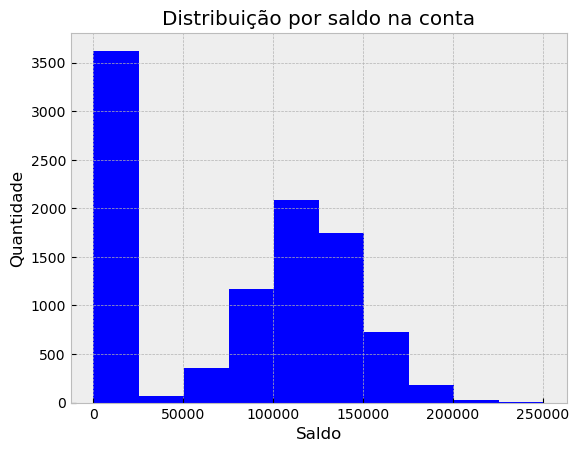

In [13]:
_ = plt.hist(churn_df.balance, bins=10, color='b')
_ = plt.title('Distribuição por saldo na conta') 
_ = plt.xlabel('Saldo')
_ = plt.ylabel('Quantidade')

In [14]:
clientes_zero_saldo = len(churn_df.query('balance==0'))
total_clientes = len(churn_df)
print('Temos {:.2%} de nossos clientes sem saldo'.format(clientes_zero_saldo/total_clientes))

Temos 36.17% de nossos clientes sem saldo


### RELAÇÃO IDADE X SALÁRIO

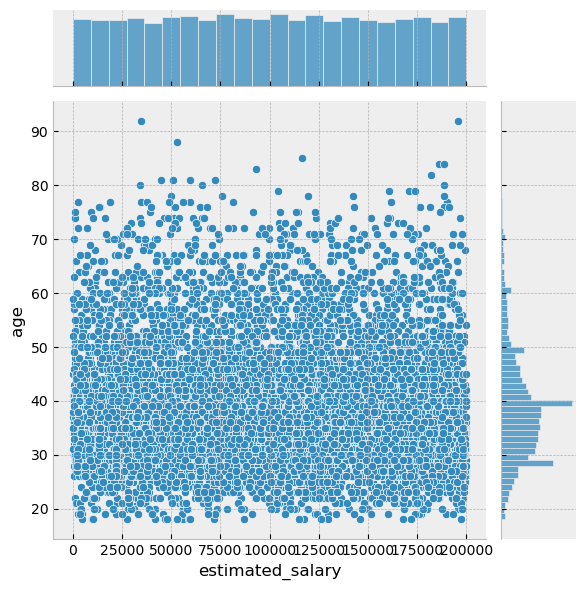

In [15]:
_ = sns.jointplot(x='estimated_salary', y='age', data=churn_df)

- Clientes que estão na faixa de 30 a 40 anos, possuem maior salário.
- Jovens até 26, 27 anos e o grupo acima de 50 anos possuem menor salário.

### ANÁLISE DE CHURN

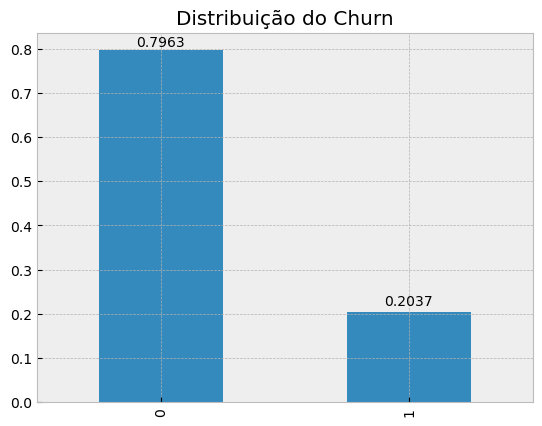

In [16]:
_ = churn_df.churn.value_counts(1).plot.bar()
_ = plt.title("Distribuição do Churn")
_ = plt.text(-0.1, 0.805, churn_df.churn.value_counts(1)[0])
_ = plt.text(0.9, 0.22, churn_df.churn.value_counts(1)[1])

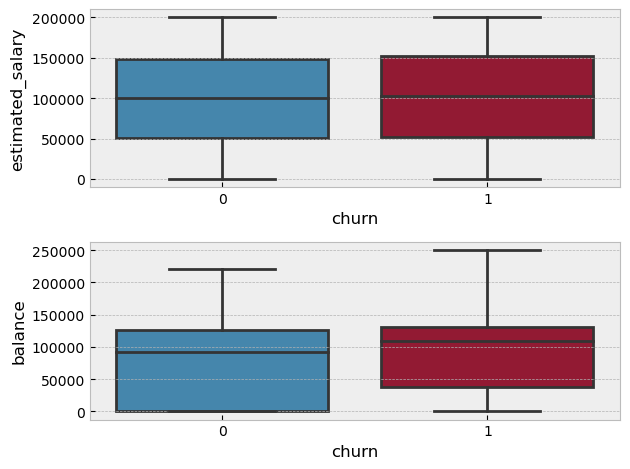

In [17]:
fig, axes = plt.subplots(2, 1) # duas linhas, uma coluna

_ = sns.boxplot(data=churn_df, x = 'churn', y = 'estimated_salary', ax = axes[0])
_ = sns.boxplot(data=churn_df, x = 'churn', y = 'balance', ax = axes[1])
_ = fig.tight_layout()

- Observa-se que o salário não é um indicador forte para analisar o churn. 
- O valor médio do saldo na conta parace indicar relação com o churn.

### VALOR MÉDIO DO SALDO NA CONTA X CHURN

In [18]:
churn_df.groupby('churn')['balance'].median()

churn
0     92072.68
1    109349.29
Name: balance, dtype: float64

### VALORES AGRUPADOS X CHURN

In [19]:
from scipy.stats import skew

agg_func = {
    'estimated_salary': ['min', 'median', 'mean', 'std', skew], 
    'balance':['min', 'median', 'mean', 'std', skew],
    'age':['min', 'median', 'mean', 'std', skew]
}

churn_df.groupby('churn').agg(agg_func)

estimated_salary                                                    \
                   min     median           mean           std      skew   
churn                                                                      
0                90.07   99645.04   99738.391772  57405.586966  0.010994   
1                11.58  102460.84  101465.677531  57912.418071 -0.033080   

      balance                                                  age         \
          min     median          mean           std      skew min median   
churn                                                                       
0         0.0   92072.68  72745.296779  62848.040701 -0.046879  18   36.0   
1         0.0  109349.29  91108.539337  58360.794816 -0.512354  18   45.0   

                                       
            mean        std      skew  
churn                                  
0      37.408389  10.125363  1.377439  
1      44.837997   9.761562  0.077920

### CHURN X PAÍSES DE ATUAÇÃO DO BANCO

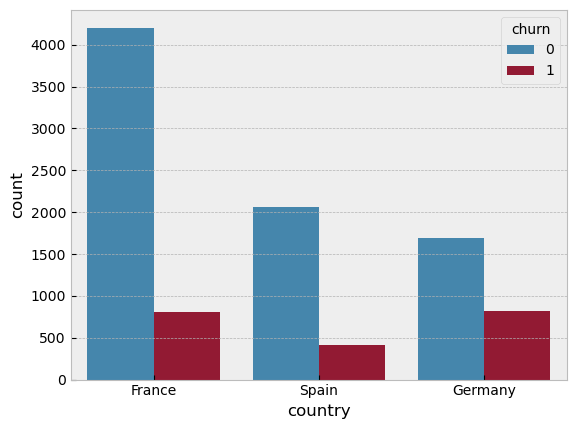

In [20]:
_ = sns.countplot(data=churn_df, x='country', hue='churn')
_ = plt.style.use('bmh')

In [21]:
churn_df.groupby('country')['churn'].mean().sort_values()

country
France     0.161548
Spain      0.166734
Germany    0.324432
Name: churn, dtype: float64

### Vamos ver se o churn relaciona-se com o fato do cliente ter cartão

In [22]:
churn_df.groupby('credit_card')['churn'].mean().sort_values()

credit_card
1    0.201843
0    0.208149
Name: churn, dtype: float64

### CONCLUSÃO

#### Nota-se que os clientes da Alemanha são mais propensos ao CHURN.

- Existem produtos que nós ofertamos nos outros dois países que não ofertamos na Alemanha?
- As condições dos produtos ofertados são as mesmas para os três países?

#### Nota-se que os clientes com um saldo médio maior na conta são mais propensos ao CHURN.

- Se os clientes CHURN estão com saldo na conta, será que podemos considerar oferecer algum produto para investimento?
- Podemos considerar oferecer alguma condição especial para quem tem saldo na conta.

#### Outras informações

- O fato de ter ou não cartão de crédito não influencia nada em relação ao Churn.
- Percebe-se que a idade média de clientes que deixam o banco (churn) é maior para os três países onde o banco atua.
- Clientes que deixam o banco têm, em média 45 anos. Clientes que não dão churn têm, em média 37 anos.
- Podemos verificar quais produtos os clientes na faixa de idade entre 44 e 49 anos mais procuram e oferecer melhores condições.

